In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame, concat
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE

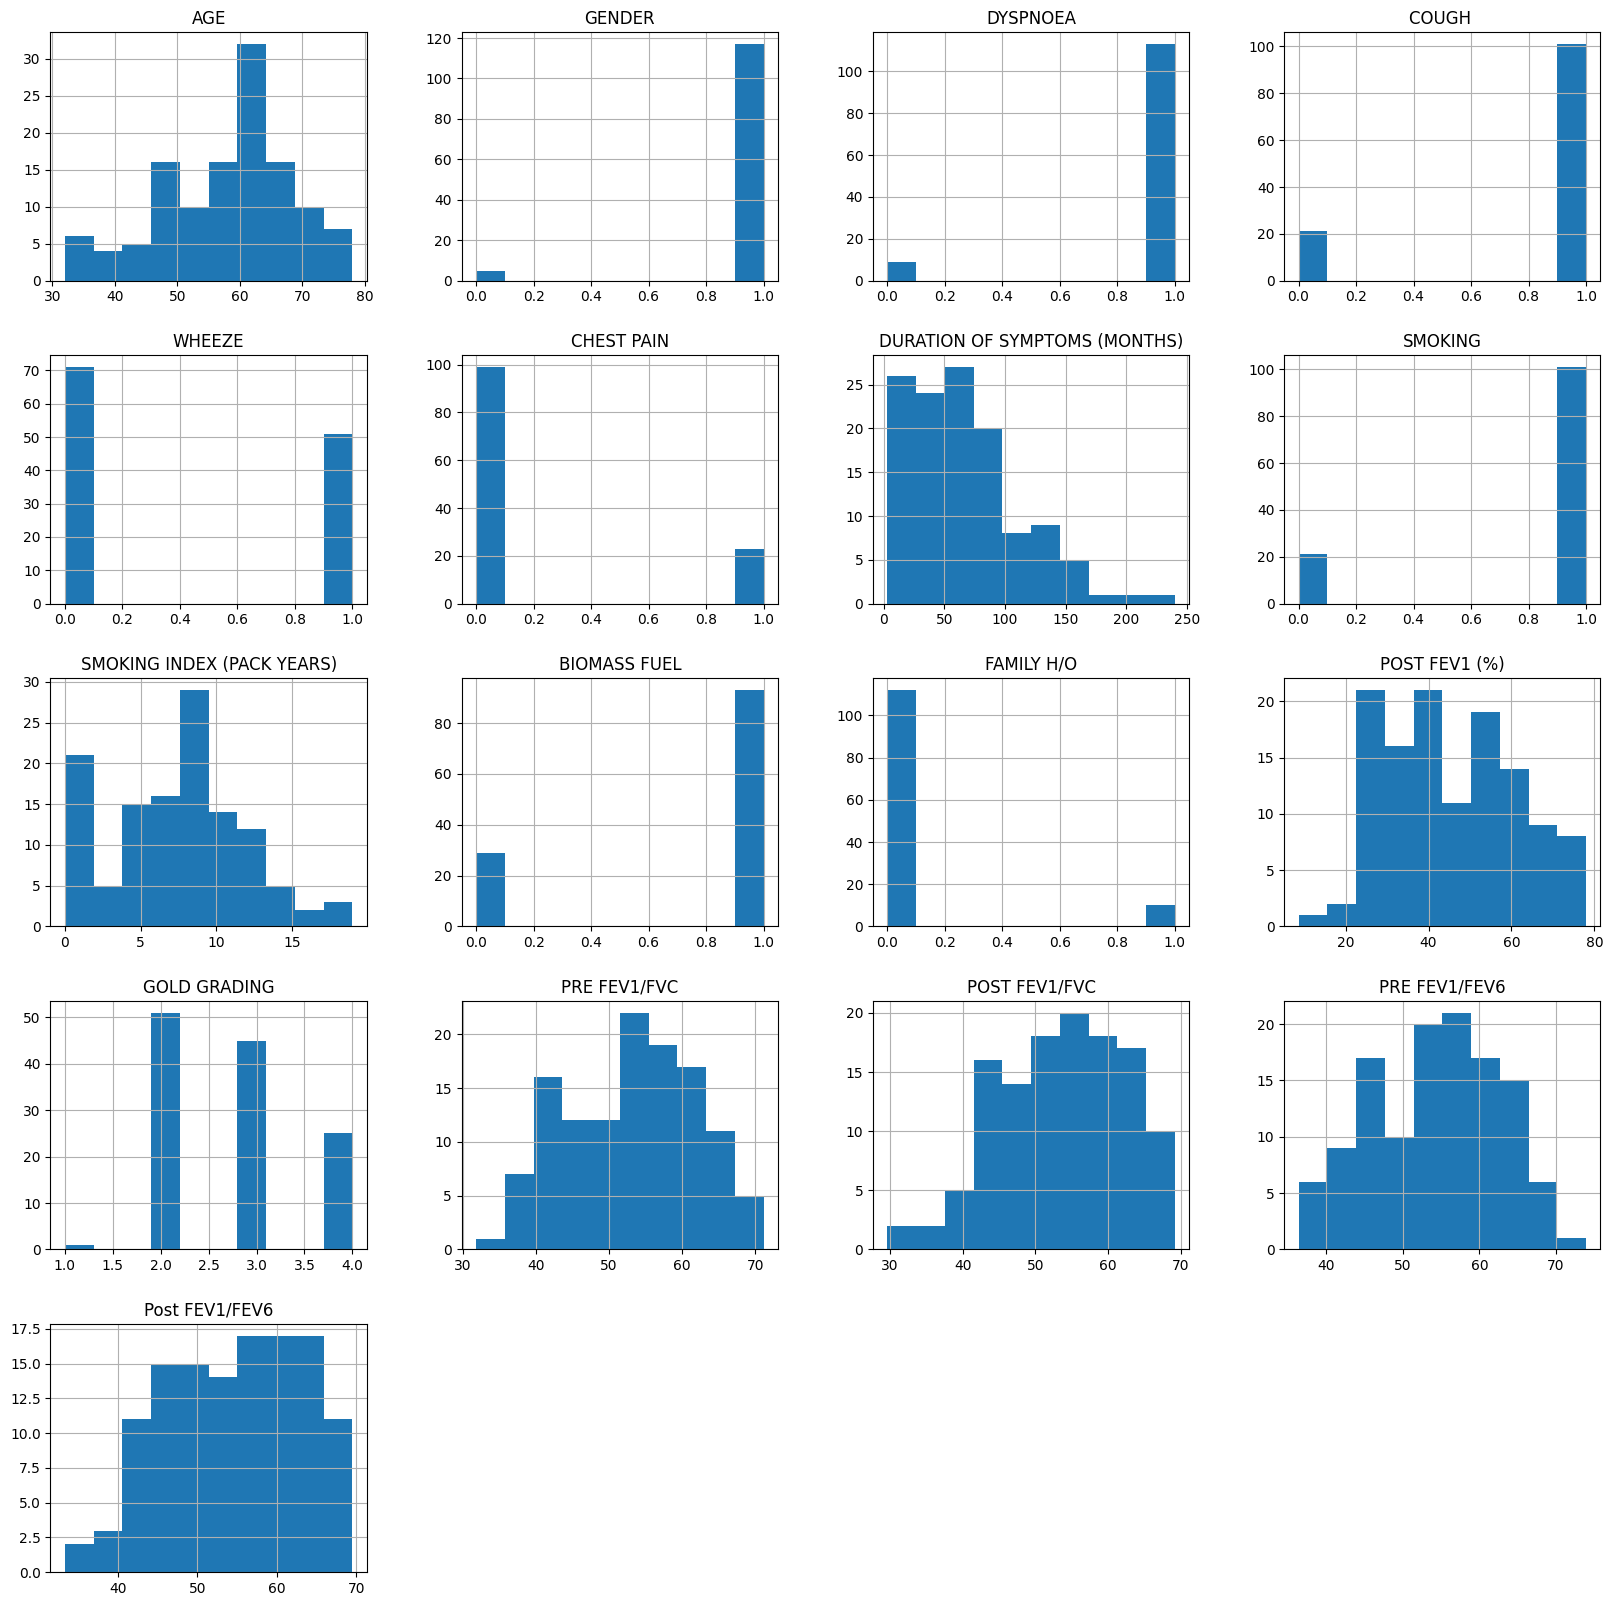

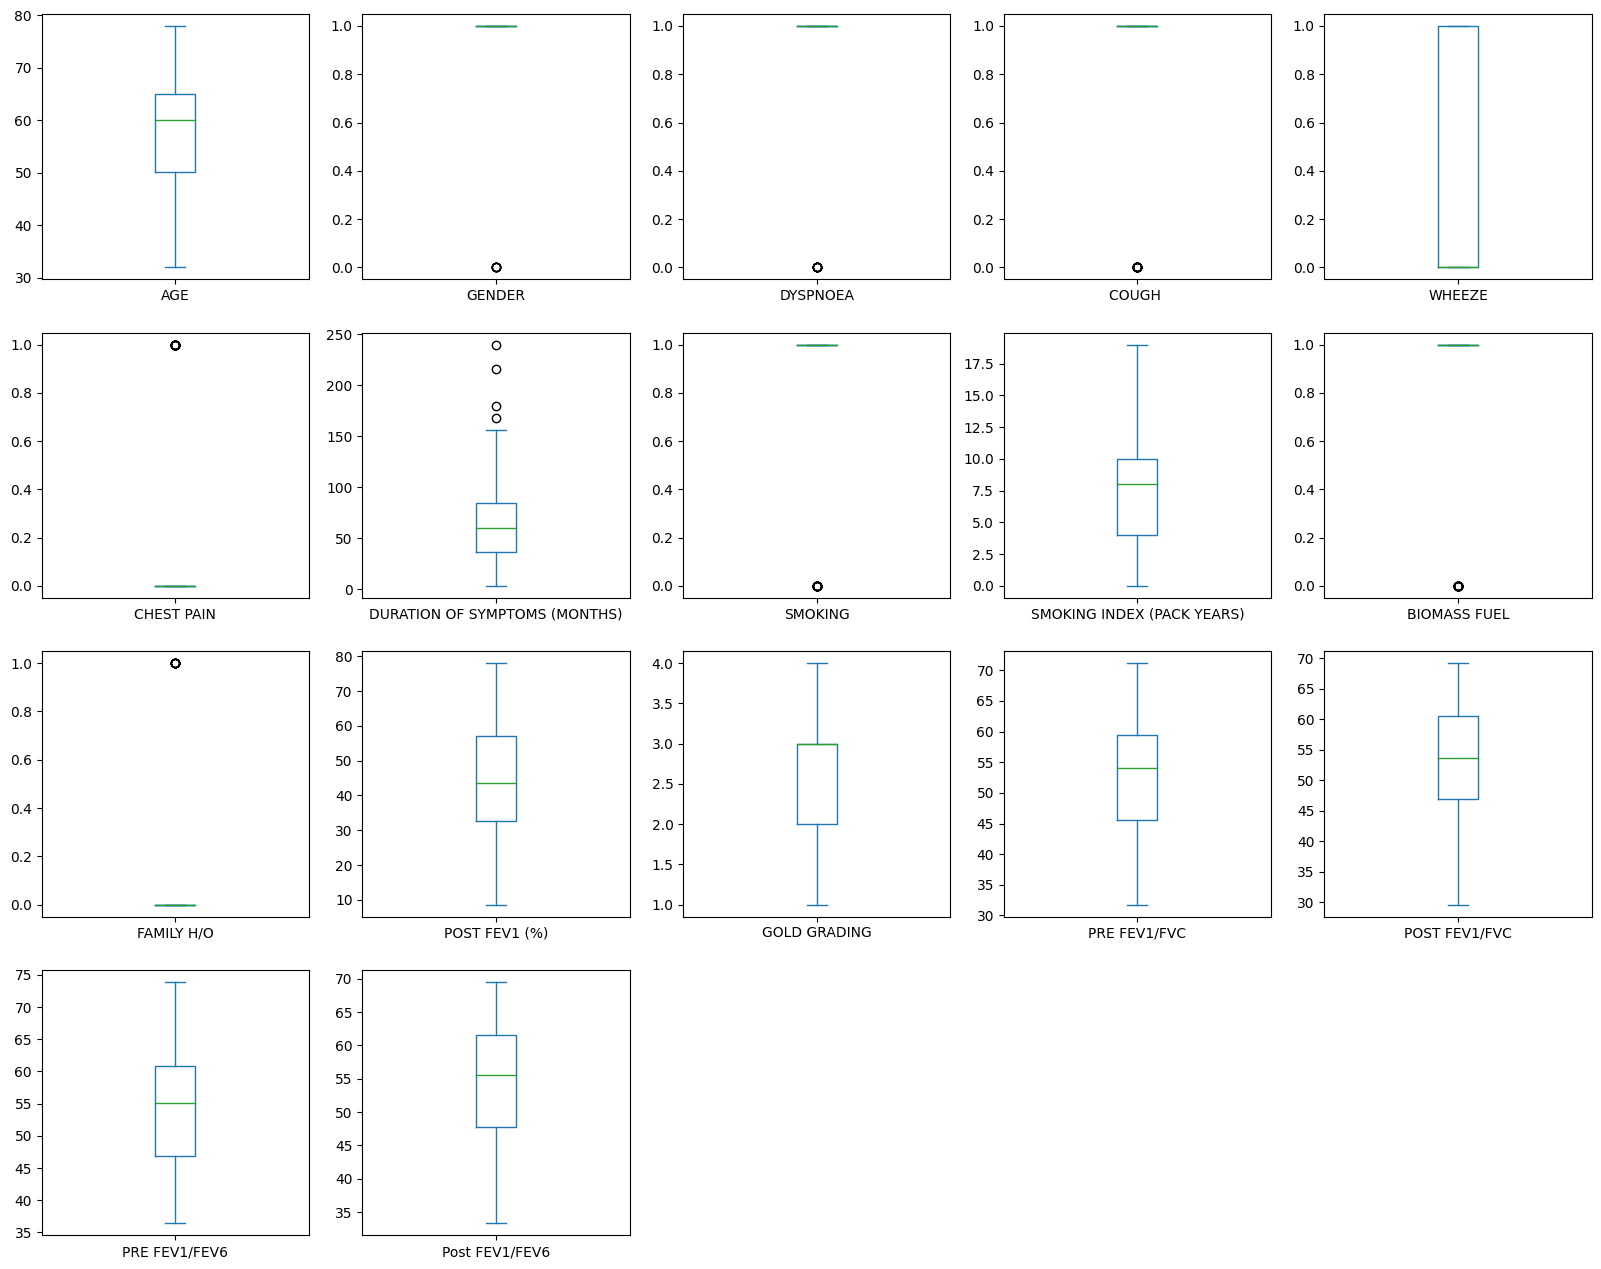

In [27]:


palani = pd.read_excel("data/palani_data.xlsx")

# drop participant id
palani = palani.drop(['S NO'], axis=1)
# convert non numeric values to numeric
palani['GENDER'] = np.where(palani['GENDER'] == 'M', 1, 0)
# convert all 'YES' values in the dataset to 1
palani = palani.replace('YES', 1)
# convert all 'NO' values in the dataset to 0
palani = palani.replace('NO', 0)


# plot histogram
palani.hist(figsize=(20,20), sharex=False, sharey=False)
# plot boxplots
palani.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(20,20))

# normalize
# use minmax scaling to scale everything except the target
target = palani['GOLD GRADING']
kaggle = palani.drop(columns=['GOLD GRADING'])

transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(kaggle)
tmp = DataFrame(transf.transform(kaggle), index=kaggle.index, columns=kaggle.columns)
palani= concat([tmp, target], axis=1)


# balancing
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(palani.drop(['GOLD GRADING'], axis=1), palani['GOLD GRADING'])
# X_res = pd.DataFrame(X_res)
# y_res = pd.DataFrame(y_res)
# X_res['GOLD GRADING'] = y_res

# save final dataset
palani.to_excel("data/palani_preprocessed.xlsx", index=False)

In [32]:
# classification

# import lazy classifier
from lazypredict.Supervised import LazyClassifier

palani = pd.read_excel("data/palani_preprocessed.xlsx")

# drop all the spirometry values
palani = palani.drop(columns=["POST FEV1 (%)","PRE FEV1/FVC","POST FEV1/FVC","PRE FEV1/FEV6","Post FEV1/FEV6"])

# if target is 4 then make it 1 else 0
palani['GOLD GRADING'] = np.where(palani['GOLD GRADING'] == 4, 1, 0)

# # perform balancing
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(palani.drop(['GOLD GRADING'], axis=1), palani['GOLD GRADING'])
X_res = pd.DataFrame(X_res)
y_res = pd.DataFrame(y_res)
X_res['GOLD GRADING'] = y_res

print(X_res['GOLD GRADING'].value_counts())

# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(palani.drop(['GOLD GRADING'], axis=1), palani['GOLD GRADING'], test_size=0.2, random_state=42)

# fit the model
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:00<00:00, 60.49it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.80,0.65,0.65,0.79,0.01
BaggingClassifier,0.76,0.62,0.62,0.76,0.02
LGBMClassifier,0.84,0.60,0.60,0.79,0.02
XGBClassifier,0.80,0.57,0.57,0.76,0.03
QuadraticDiscriminantAnalysis,0.44,0.57,0.57,0.47,0.01
ExtraTreeClassifier,0.76,0.55,0.55,0.74,0.01
GaussianNB,0.76,0.55,0.55,0.74,0.01
PassiveAggressiveClassifier,0.72,0.53,0.53,0.71,0.01
NearestCentroid,0.60,0.53,0.52,0.63,0.01
